In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)
df = pd.DataFrame(data=adult.data.features, columns=adult.feature_names)
df['income'] = adult.data.targets
df.to_csv('adult_data.csv', index=False)


fnlwgt - an estimate of the number of individuals in the population with the same demographics as this individual

In [31]:
df = pd.read_csv('adult_data.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [32]:
missing_values = df.isna().sum()
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


## Basic statistics for quantitative features

In [33]:
df_quantitative = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
description = df_quantitative.describe(include='all')
description.round(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.0,48842.00
mean,38.64,189664.13,10.08,1079.07,87.5,40.42
std,13.71,105604.03,2.57,7452.02,403.0,12.39
min,17.00,12285.00,1.00,0.00,0.0,1.00
25%,28.00,117550.50,9.00,0.00,0.0,40.00
50%,37.00,178144.50,10.00,0.00,0.0,40.00
75%,48.00,237642.00,12.00,0.00,0.0,45.00
max,90.00,1490400.00,16.00,99999.00,4356.0,99.00


## Basic statistics for qualitative features


In [34]:
df_qualitative = df.drop(columns=df_quantitative.columns)
description_qualitative = df_qualitative.describe(include='all')
description_qualitative.round(4)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


### <span style="color: #8B0000;">Income should have only two unique values. The following examines why there are 4 unique values and then repairs the data.</span>

In [35]:
unique_income = df['income'].unique()
print(unique_income)
df['income'] = df['income'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})
print(df['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']
['<=50K' '>50K']


In [37]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unikalne wartości dla kolumny '{col}': {unique_values}")

Unikalne wartości dla kolumny 'age': [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Unikalne wartości dla kolumny 'workclass': ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
Unikalne wartości dla kolumny 'fnlwgt': [ 77516  83311 215646 ... 173449  89686 350977]
Unikalne wartości dla kolumny 'education': ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Unikalne wartości dla kolumny 'education-num': [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unikalne wartości dla kolumny 'marital-status': ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Unikaln

### <span style="color: #8B0000;">cleaning incorrect values for other columns</span>

In [54]:
df['workclass'] = df['workclass'].replace('?', np.nan)

In [55]:
for col in df.columns:
    df[col] = df[col].replace('?', np.nan)

In [56]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unikalne wartości dla kolumny '{col}': {unique_values}")

Unikalne wartości dla kolumny 'age': [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Unikalne wartości dla kolumny 'workclass': ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unikalne wartości dla kolumny 'fnlwgt': [ 77516  83311 215646 ... 173449  89686 350977]
Unikalne wartości dla kolumny 'education': ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Unikalne wartości dla kolumny 'education-num': [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unikalne wartości dla kolumny 'marital-status': ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Unikalne wa

## Checking the balance of the dataset

In [62]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

## Correlation between features - trzeba zakodować jakościowe bo nie można teraz zbadać kolreacji !!!!

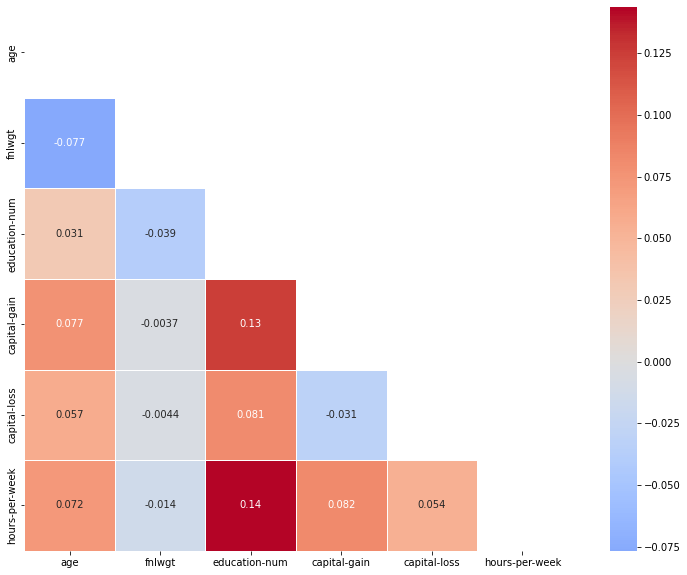

In [69]:
plt.figure(figsize=(15,10))
corr = df.corr()
heat_map = sns.heatmap( corr,
    center=0, 
    cmap="coolwarm", 
    square=True,
    annot=True,
    mask=np.triu(df.corr()),linewidth=1, linecolor='white' )

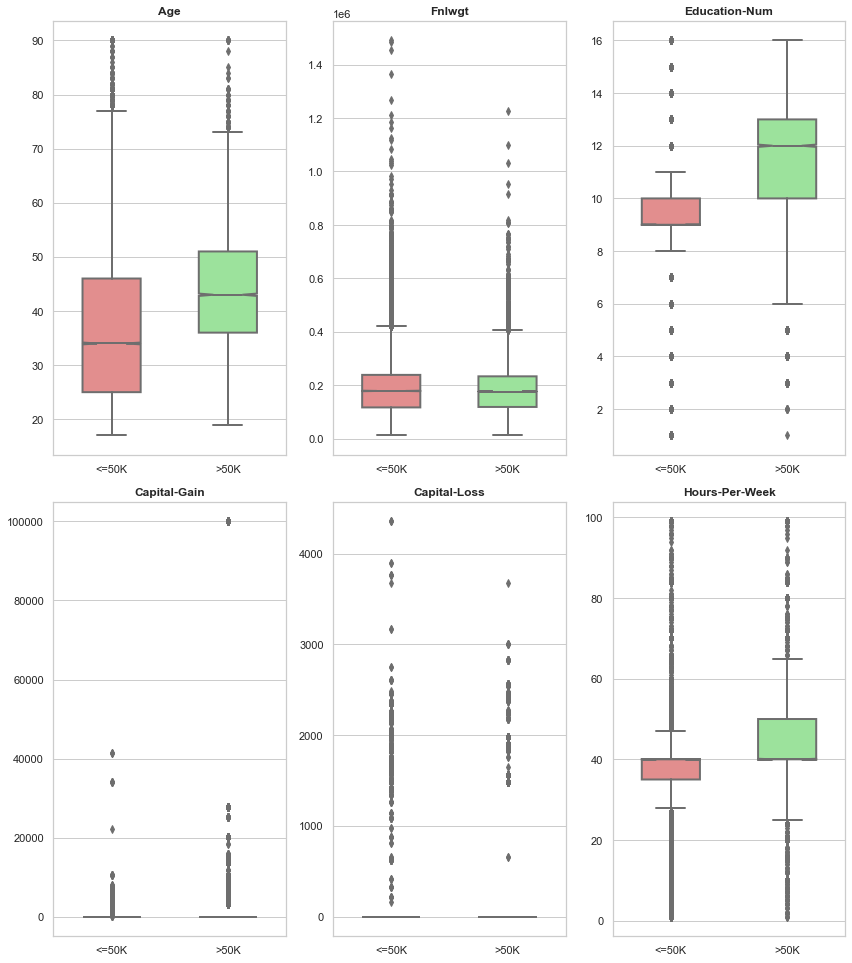

In [83]:
sns.set(style="whitegrid")

# Ustalenie rozmiaru wykresu
plt.figure(figsize=(12, 40))

# Pętla po kolumnach numerycznych (df_quantitative)
for i, col in enumerate(df_quantitative.columns, 1):
    plt.subplot(6, 3, i)  # 6 wierszy, 3 kolumny, numeracja od 1
    sns.boxplot(data=df, x='income', y=col, linewidth=2,
                palette={"<=50K": "lightcoral", ">50K": "lightgreen"}, width=0.5, notch=True)
    plt.title(col.title(), fontsize=12, weight='bold')
    plt.ylabel('', fontsize=12, weight='bold')
    plt.xlabel('')
    plt.tight_layout()
#show layers=false
plt.show()

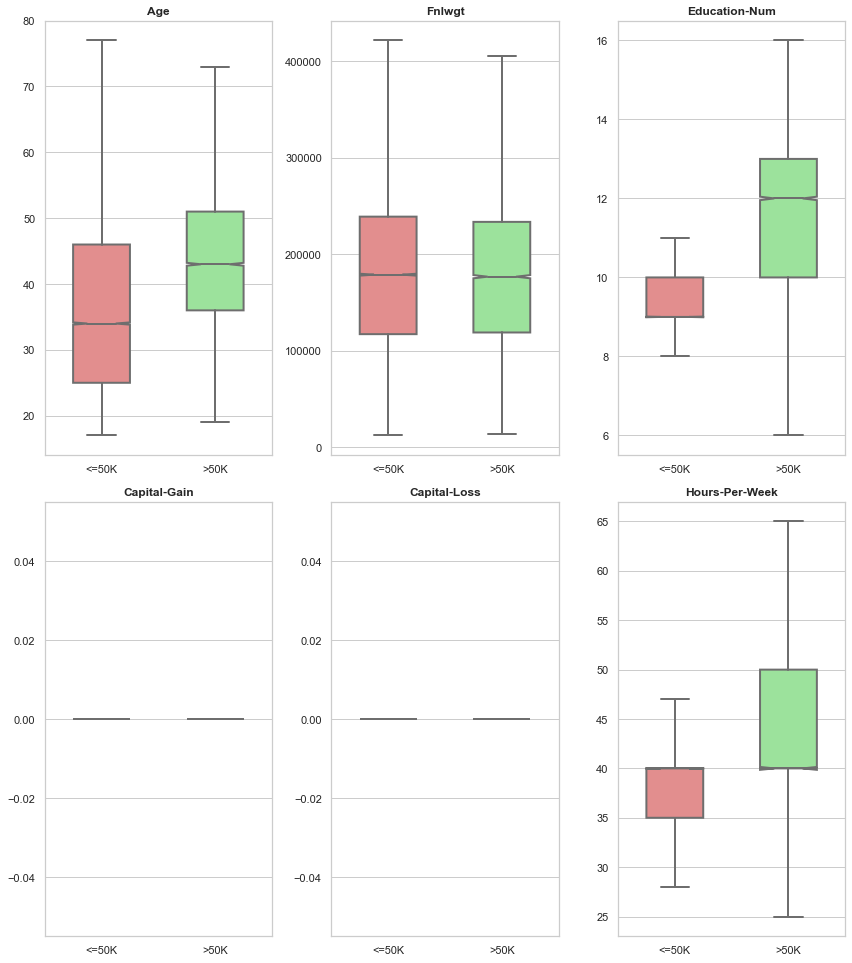

In [120]:
sns.set(style="whitegrid")

# Ustalenie rozmiaru wykresu
plt.figure(figsize=(12, 40))

# Pętla po kolumnach numerycznych (df_quantitative)
for i, col in enumerate(df_quantitative.columns, 1):
    plt.subplot(6, 3, i)  # 6 wierszy, 3 kolumny, numeracja od 1
    sns.boxplot(data=df, x='income', y=col, linewidth=2,
                palette={"<=50K": "lightcoral", ">50K": "lightgreen"}, width=0.5, notch=True, showfliers=False)
    plt.title(col.title(), fontsize=12, weight='bold')
    plt.ylabel('', fontsize=12, weight='bold')
    plt.xlabel('')
    plt.tight_layout()
#show layers=false
plt.show()

In [92]:
# Używając metody value_counts() na kolumnie 'workclass'
workclass_counts = df['workclass'].value_counts()
print(workclass_counts)
workclass_counts_dict = workclass_counts.to_dict()
print(workclass_counts_dict)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


KeyError: 0

In [94]:
# Konwersja zliczeń do DataFrame
grouped_counts_df = grouped_counts.reset_index(name='count')

# Wyświetlenie DataFrame'u
print(grouped_counts_df)


   income         workclass  count
0   <=50K           Private  26519
1   <=50K  Self-emp-not-inc   2785
2   <=50K         Local-gov   2209
3   <=50K         State-gov   1451
4   <=50K       Federal-gov    871
5   <=50K      Self-emp-inc    757
6   <=50K       Without-pay     19
7   <=50K      Never-worked     10
8    >50K           Private   7387
9    >50K  Self-emp-not-inc   1077
10   >50K      Self-emp-inc    938
11   >50K         Local-gov    927
12   >50K       Federal-gov    561
13   >50K         State-gov    530
14   >50K       Without-pay      2


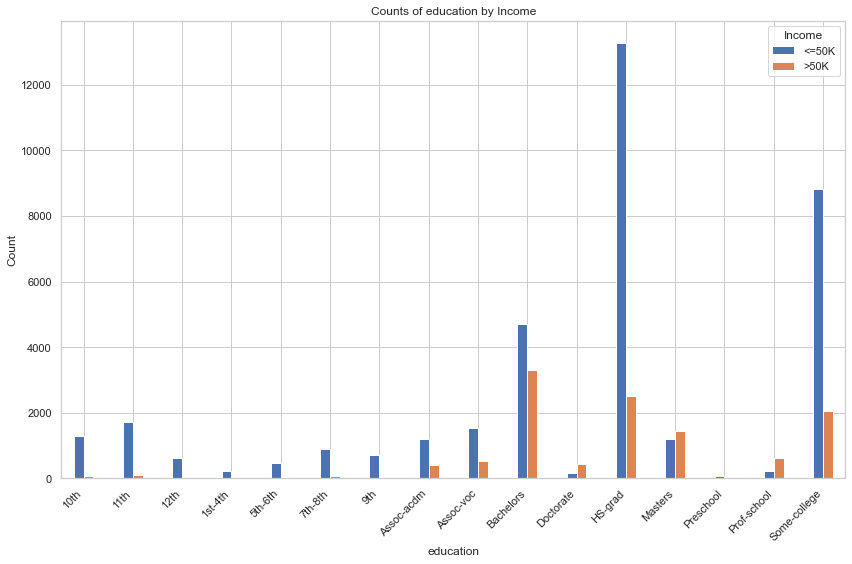

In [107]:
import matplotlib.pyplot as plt

# Grupowanie danych według kolumn 'income' i 'workclass', zliczenie wartości
grouped_counts = df.groupby(['education', 'income']).size().unstack()

# Stworzenie wykresu słupkowego
fig, ax = plt.subplots(figsize=(12, 8))  # Zwiększenie rozmiaru wykresu
grouped_counts.plot(kind='bar', width=0.4, position=0.5, ax=ax)
plt.xlabel("education")
plt.ylabel("Count")
plt.title("Counts of education by Income")
plt.legend(title='Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


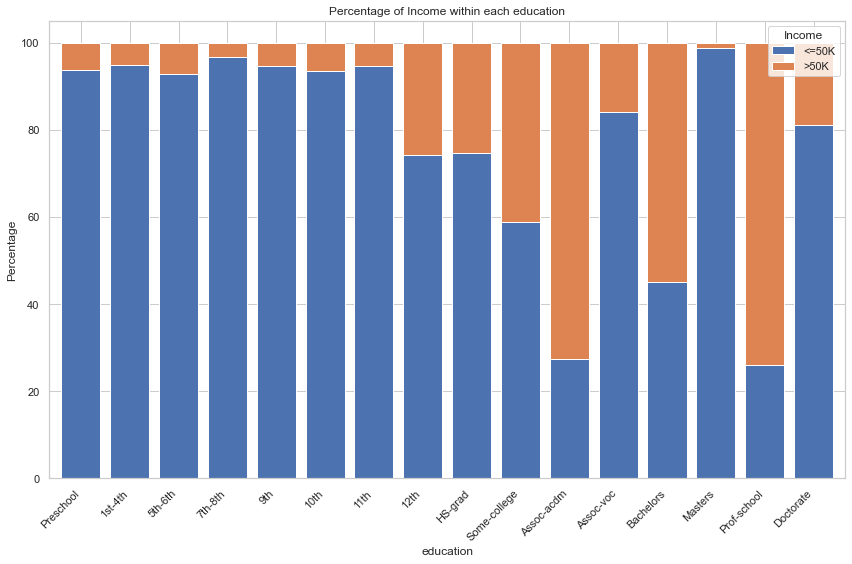

In [118]:
# Grupowanie danych według kolumn 'income' i 'workclass', zliczenie wartości
grouped_counts = df.groupby(['education', 'income']).size().unstack()

# Przekształcenie danych na postać procentową
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Stworzenie wykresu słupkowego
fig, ax = plt.subplots(figsize=(12, 8))
grouped_percentages.plot(kind='bar', width=0.8, stacked=True, ax=ax)
plt.xlabel("education")
plt.ylabel("Percentage")
plt.title("Percentage of Income within each education")
plt.legend(title='Income', loc='upper right')
education_sorted = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters',
     'Prof-school','Doctorate',]
plt.xticks(ticks=range(len(education_sorted)), labels=education_sorted, rotation=45, ha='right')
plt.tight_layout()
plt.show()





In [110]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

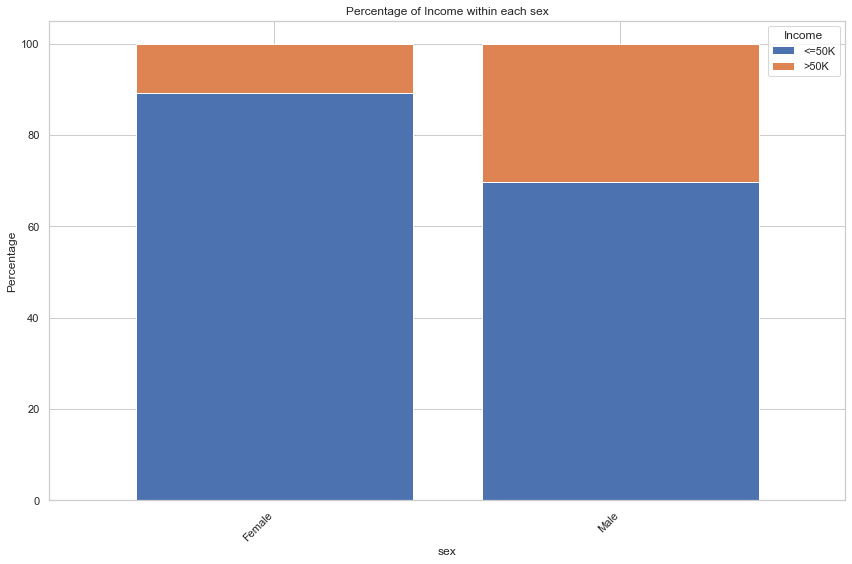

In [119]:
# Grupowanie danych według kolumn 'income' i 'workclass', zliczenie wartości
grouped_counts = df.groupby(['sex', 'income']).size().unstack()

# Przekształcenie danych na postać procentową
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Stworzenie wykresu słupkowego
fig, ax = plt.subplots(figsize=(12, 8))
grouped_percentages.plot(kind='bar', width=0.8, stacked=True, ax=ax)
plt.xlabel("sex")
plt.ylabel("Percentage")
plt.title("Percentage of Income within each sex")
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
